NC5NG/GMT:JUPYTER
===================

Welcome to the example jupyter notebook for the NC5NG provided GMT docker image

This notebook serves as an example to use the python-gmt distribution

In order to save this to local drive, execute the docker container with a volume mounted to the "/workspace" folder . For example, to mount your working directory into the container 

    docker run -p "127.0.0.1:8888:8888" -v "$PWD:/workspace" nc5ng/gmt:jupyter
    
    

In [2]:
import gmt
print(gmt.__version__)

0.1a3+79.gf979f02


## GMT Options

`gmt-python` maps keyword arguments to the gmt module arguments for psxy, pscoast, psbasemap, etc. commands

Because these are keywords, we can make better sense of them as a configuration by using a dictionary

The options are distinct, but must be split the options dictionaries up due to a limitation of the underlying framework.



In [3]:
from numpy import array
DATA_POINT = array([(261.414478,39.8333333),])
gmt_opts={
    'basemap':{
        'region':(235.0, 294.0, 24.0, 50.0), # conus region
        'projection':"M10.0i", # large mercator projection
        'frame':True, # Frame Options - just show
    },
    'coast':{    
        'area_thresh':10000,  # area_thresh 
        'resolution':'c', # coarse feature resolution
        'shorelines':'1', # shoreline detail 1 - (Oceans)
        'borders':['1/0.5,black,-','2/0.5,black,-'], # Political Borders, National and State
        'water':'lightblue', # Water Color (Oceans and Seas)
        'land':'chocolate', # Land Color
        'rivers':['1/darkblue','2/blue'], #River Color (1-Major, 2-Minor)
    },
    'plot':{
        'style':"a25p",  # Plot symbol: asterix 25 pixels
        'color':"black", # Plot Symbol Color
    }
}




## Figure

Plot a simple map using the default options

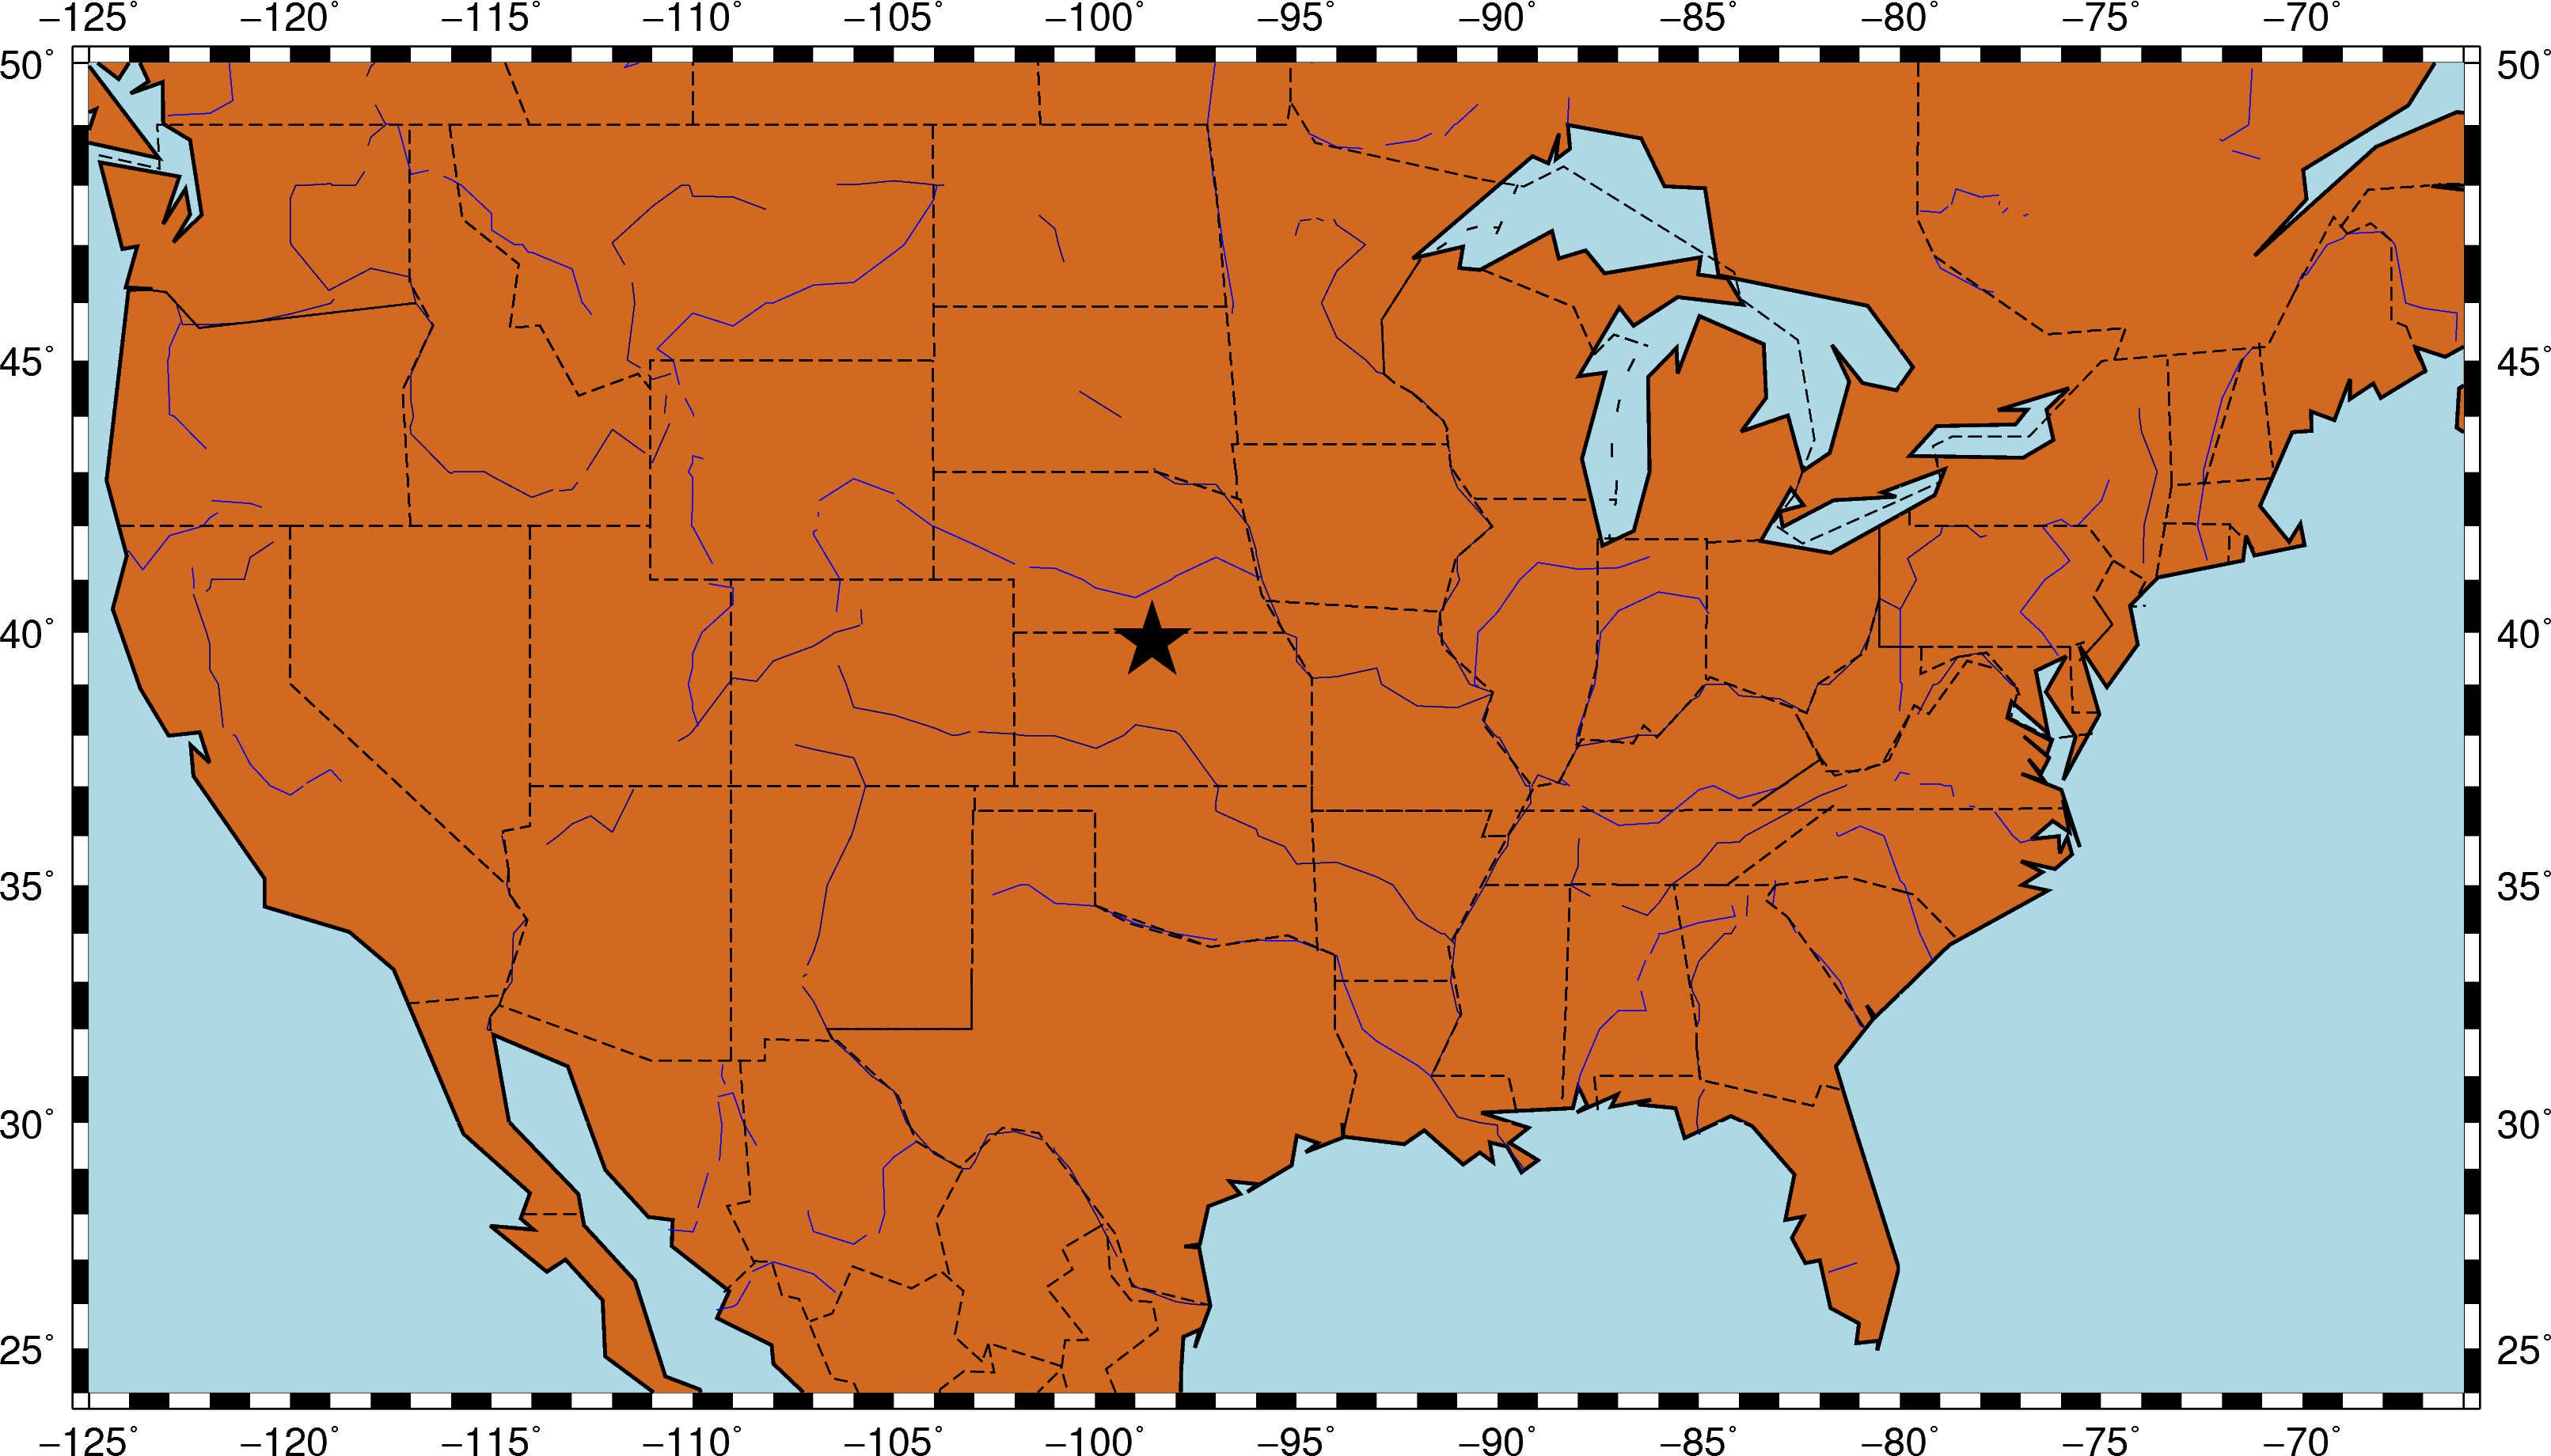

In [6]:
fig = gmt.Figure() # Create the figure
fig.basemap(**gmt_opts['basemap'])
fig.coast(**gmt_opts['coast'])
fig.plot(data = DATA_POINT, **gmt_opts['plot'])
fig.show()
